In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [3]:
df =pd.read_csv('train_2v.csv')
df.head(7)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [98]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [30]:
df.shape

(43400, 12)

In [99]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [32]:
df.dropna(axis =1,thresh=13292,inplace = True)
# drops all rows have less than or equal to n null values in the dataset
# expects to drop 1492 and 13292 null values in bmi and smoking_status 


 Gender vs Stroke

In [100]:
df.stroke.value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [34]:
df.gender.value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

In [101]:
df = df[df.gender !='Other']
# forms a df with gender column without 'Other' values
# in another word we drop Other in gender

In [102]:
# find the number of male, female with and without stroke respectively:
num_female_stroke = len(df[(df['gender']== 'Female') & (df['stroke']==1)])
num_males_stroke = len(df[(df['gender']== 'Male') & (df['stroke']==1)])
num_female_no_stroke = len(df[(df['gender']== 'Female') & (df['stroke']== 0)])
num_males_no_stroke = len(df[(df['gender']== 'Male') & (df['stroke']==0)])
print(num_female_stroke,num_males_stroke, num_female_no_stroke,num_males_no_stroke)

431 352 25234 17372


In [103]:
# probability of male having stroke in a male population
p_males_stroke =num_males_stroke/(num_males_stroke+num_males_no_stroke) 
p_males_stroke

0.019860076732114647

In [104]:
# probability of a female having stroke in a female population
P_female_stroke = num_female_stroke/(num_female_stroke + num_female_no_stroke )
P_female_stroke

0.016793298266121175

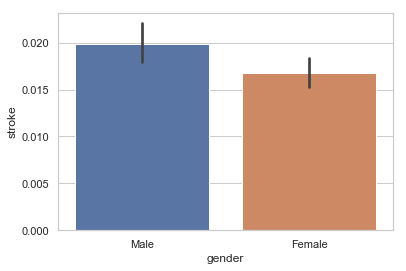

In [52]:
sns.set(style="whitegrid")
sns.barplot(x="gender",y="stroke",data=df)
# graph shows the probability of a male and female having stroke 
#  P(male_stroke) = 0.0199, and P(female_stroke) = 0.0168

ANOVA
1)The results above (either by calculation or graphing)
shows that men tend to have higher probability of having stroke comparing to their female counterparts.
2)We use ANOVA to prove/disprove if gender have impacts on having stroke.

Hypothesis:
    H_nod : mu_males_stroke = mu_female_stroke
    H_alt :  mu_males_stroke != mu_female_stroke 

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
df['stroke'].groupby(df['gender']).describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,25665.0,0.016793,0.128499,0.0,0.0,0.0,0.0,1.0
Male,17724.0,0.019860,0.139523,0.0,0.0,0.0,0.0,1.0
Other,11.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [7]:
stats.f_oneway(df['stroke'][df['gender']== 'Female'],
               df['stroke'][df['gender']== 'Male'])

F_onewayResult(statistic=5.564813525658821, pvalue=0.018329368548732357)

1)The F-statistic = 5.565 and the p-value = 0.018 indicating that there is an significant effect of gender on stroke.But we don't know where the diffrence is. 
2)We create our model using: formula = Contrl_col +C(gender)
where our control attribute is stroke and gender is a factor in having stroke.

In [9]:
# Generating the ANOVA Table in order to analyze the influence of gender on stroke
formula = 'stroke~C(gender) '
lm = ols(formula,df).fit()
aov_table = sm.stats.anova_lm(lm,typ=2)
print(aov_table)

               sum_sq       df         F    PR(>F)
C(gender)    0.102184      2.0  2.884131  0.055914
Residual   768.771341  43397.0       NaN       NaN


If the null hypothesis is true, we expect F to have a value close to 1.0 most of the time. F = 2.88 meaning that the variation among males and female group are as we expected
Note that the assumptions apply to the residuals and not the variables. ANOVA is validate if assumptions include: Normality, homogeneity of variance, and independent observation are true.We will check these assumptions with the linear models below.

In [11]:
lm = ols(formula,df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 stroke   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.884
Date:                Sun, 04 Aug 2019   Prob (F-statistic):             0.0559
Time:                        11:18:16   Log-Likelihood:                 25943.
No. Observations:               43400   AIC:                        -5.188e+04
Df Residuals:                   43397   BIC:                        -5.185e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0168      0.001     20.213      0.000       0.015       0.018
C(gender)[T.Male]      0.0031      0.001      2.359      0.018       0.001       0.006
C(gender)[T.Other]    -0.0168      0.040     -0.418      0.676      -0.095       0.062
==============================================================================
Omnibus:                    54382.668   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4978645.978
Skew:                           7.241   Prob(JB):                         0.00
Kurtosis:                      53.433   Cond. No.                         69.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Jarque-Bera(JB,Prob(jb) is p-value = 0 # tests the assumption of normality
Omnibus(Prob(omnibus)) is p-value = 0 # tests the assumption                        of homogeneity of variance
Durbin -Watson tests  = 2.003 is to detect the presence of autocorrelation.
All the assumptions are true, and the F value is greater than 1. We can reject our null hypothesis. 
Indeed, gender has some impact on having stroke.